In [16]:
# Task 3: Customer Segmentation (Clustering)
# Use both customer profile and transaction information
clustering_data = merged_data.groupby('CustomerID').agg({
    'Price_y': 'mean', 'TotalValue': 'sum', 'Quantity': 'sum'
}).reset_index()

In [17]:
# Scale data
clustering_scaled = scaler.fit_transform(clustering_data.iloc[:, 1:])

In [18]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(clustering_scaled)


In [19]:
# Add cluster labels to data
clustering_data['Cluster'] = clusters

In [20]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(clustering_scaled, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.12180191226693


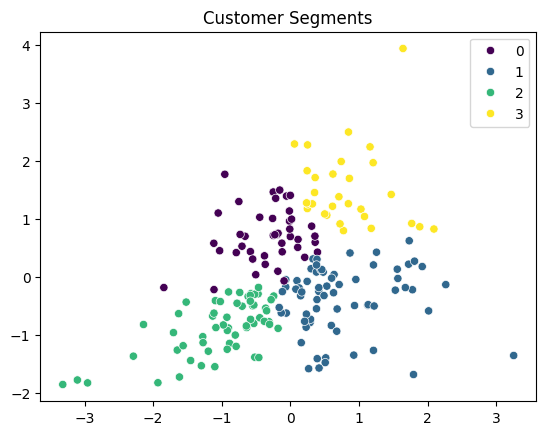

In [21]:
# Visualize clusters
sns.scatterplot(
    x=clustering_scaled[:, 0], y=clustering_scaled[:, 1], hue=clusters, palette='viridis'
)
plt.title('Customer Segments')
plt.show()

In [22]:

clustering_data.to_csv('Komal_Khare_Clustering.csv', index=False)
